In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import missingno as mno
from sklearn import linear_model

import os
print(os.listdir("./DATA"))

['csvs_per_year', 'madrid.h5', 'stations.csv']


In [6]:
partials = list()
stations = list()

with pd.HDFStore('./DATA/madrid.h5') as data:
    stations = [k[1:] for k in data.keys() if k != '/master']
    for station in stations:
        df = data[station]
        df['station'] = station
        partials.append(df)

In [7]:
measures = pd.concat(partials, sort=False).sort_index()
measures.head()

,CO,NO_2,NOx,O_3,PM10,PM25,SO_2,station,NO,BEN,EBE,MXY,NMHC,OXY,PXY,TCH,TOL,CH4
date,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1.23,55.750000,127.199997,8.38,44.950001,NaN,14.560000,28079017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01 01:00:00,0.72,49.830002,74.040001,6.37,22.170000,NaN,28.290001,28079011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01 01:00:00,1.20,43.849998,71.440002,5.50,23.790001,NaN,41.520000,28079012,NaN,NaN,NaN,NaN,0.05,NaN,NaN,1.46,NaN,NaN
2001-01-01 01:00:00,0.74,49.410000,70.750000,2.49,36.820000,NaN,9.600000,28079039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01 01:00:00,0.45,67.120003,132.899994,7.86,32.349998,NaN,26.459999,28079008,NaN,4.09,2.38,NaN,NaN,NaN,NaN,NaN,11.7,NaN


In [8]:
measures.describe()

,CO,NO_2,NOx,O_3,PM10,PM25,SO_2,NO,BEN,EBE,MXY,NMHC,OXY,PXY,TCH,TOL,CH4
count,2.651012e+06,3.787050e+06,2.376275e+06,2.991732e+06,2.861255e+06,816424.000000,2.775960e+06,1.532397e+06,1.041684e+06,1.001724e+06,315415.000000,1.085312e+06,315695.000000,315584.000000,1.086441e+06,1.038929e+06,14850.000000
mean,5.503838e-01,5.047151e+01,1.093188e+02,3.982616e+01,2.893654e+01,13.738292,1.065539e+01,2.343886e+01,1.257431e+00,1.407927e+00,4.650394,1.873865e-01,2.280912,2.056178,1.435882e+00,5.876842e+00,1.300849
std,5.354483e-01,3.455288e+01,1.102871e+02,3.039249e+01,2.594859e+01,11.214146,9.121267e+00,5.021504e+01,1.910831e+00,2.146109e+00,5.599223,1.539529e-01,2.639609,2.395130,2.332228e-01,8.524460e+00,0.195550
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-31.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.020000
25%,2.600000e-01,2.400000e+01,4.000000e+01,1.271000e+01,1.150000e+01,6.450000,5.840000e+00,2.000000e+00,2.100000e-01,3.500000e-01,1.200000,9.000000e-02,0.960000,0.800000,1.300000e+00,1.100000e+00,1.170000
50%,4.000000e-01,4.400000e+01,7.615000e+01,3.486000e+01,2.149000e+01,11.000000,8.150000e+00,6.000000e+00,6.000000e-01,8.800000e-01,2.800000,1.500000e-01,1.320000,1.280000,1.380000e+00,3.160000e+00,1.250000
75%,6.500000e-01,6.958000e+01,1.397000e+02,5.999000e+01,3.775000e+01,17.670000,1.230000e+01,2.000000e+01,1.500000e+00,1.580000e+00,5.890000,2.400000e-01,2.740000,2.510000,1.510000e+00,6.990000e+00,1.400000
max,1.804000e+01,6.286000e+02,2.537000e+03,2.360000e+02,6.950000e+02,506.899994,1.991000e+02,1.146000e+03,6.639000e+01,1.622000e+02,177.600006,9.070000e+00,103.000000,106.000000,1.048000e+01,2.429000e+02,3.920000


In [9]:
measures.isnull().sum().apply(lambda x: (x / len(measures) * 100))

CO         30.387183
NO_2        0.556007
NOx        37.601491
O_3        21.440230
PM10       24.866421
PM25       78.561555
SO_2       27.106179
station     0.000000
NO         59.760849
BEN        72.646462
EBE        73.695770
MXY        91.717530
NMHC       71.500836
OXY        91.710178
PXY        91.713093
TCH        71.471190
TOL        72.718805
CH4        99.610054
dtype: float64

<Axes: >

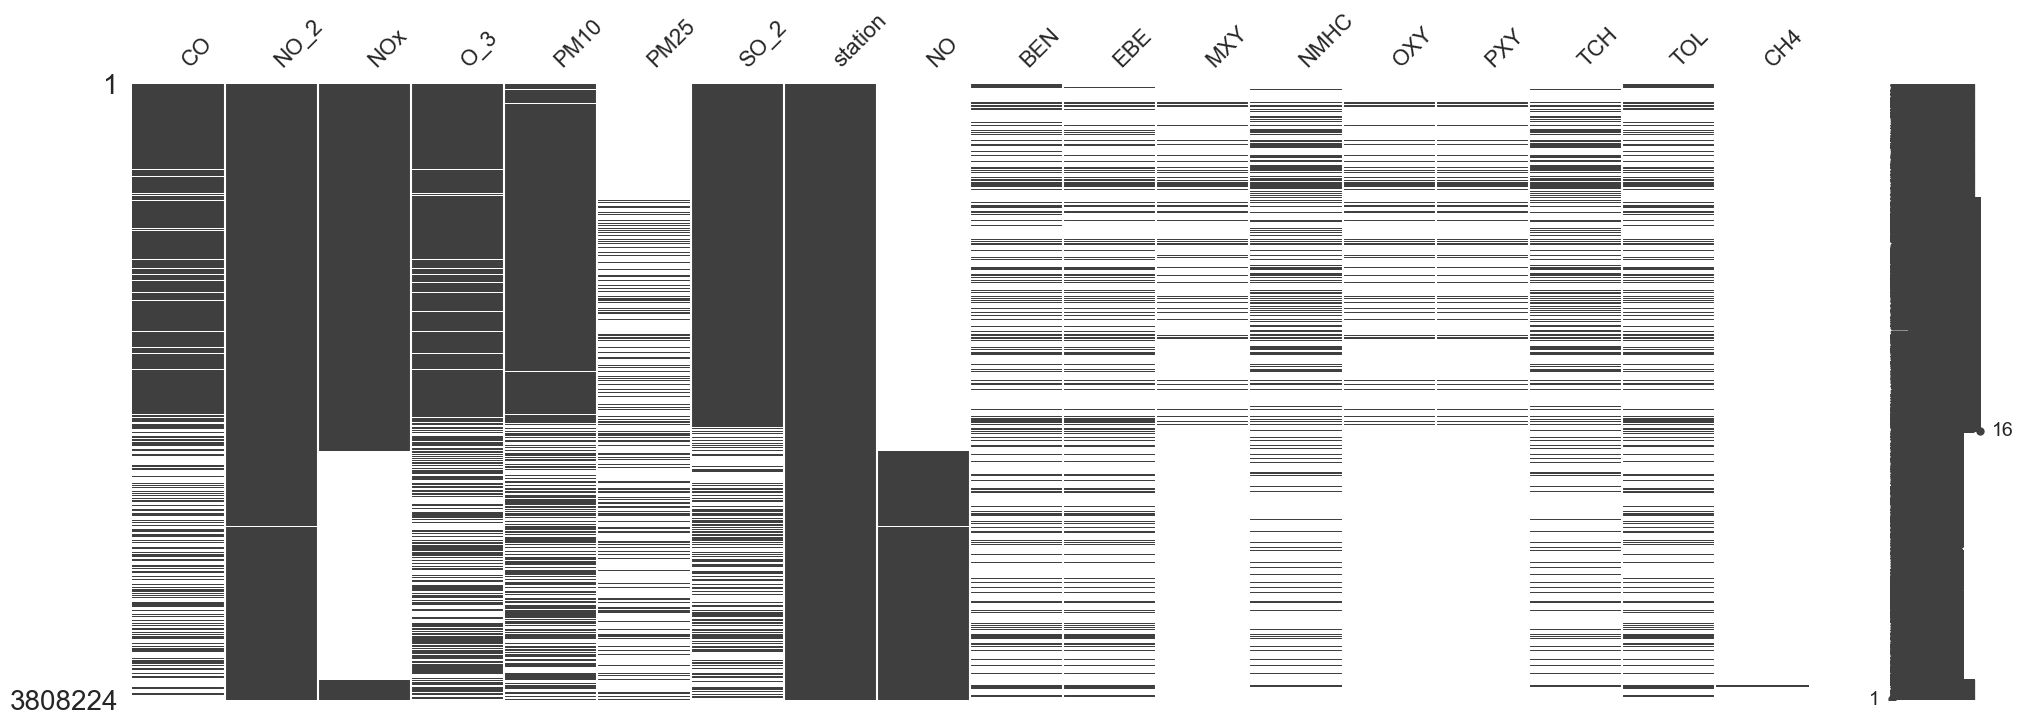

In [10]:
mno.matrix(measures, figsize = (24, 8))

<Axes: >

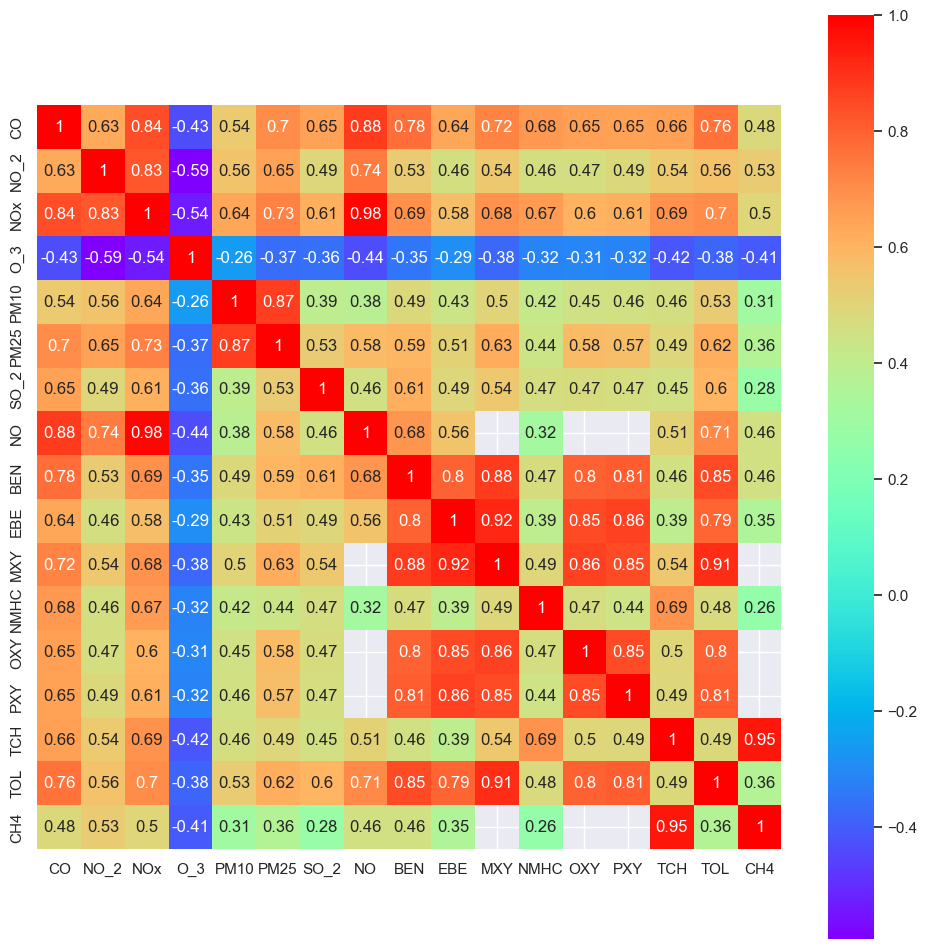

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(measures.drop('station', axis=1).corr(), square=True, annot=True, cmap='rainbow')

In [12]:
# get list of unique timestamps
RANDOM_STATION = '28079017'
one_station = measures[measures['station'] == RANDOM_STATION]
timestamps = one_station.index.to_series()

In [13]:
column_to_check = 'NMHC'
list_of_dfs = list()
for station in stations:
    station_data = measures[measures['station'] == station]
    total_observations = len(station_data)
#     print("Total observations per station: {}".format(total_observations))
#     print(station_data[column_to_check].notnull().sum())
    if station_data[column_to_check].notnull().sum() > 0:
        list_of_dfs.append(station_data[['station',column_to_check]])

df_nmhc = pd.concat(list_of_dfs)

<Axes: xlabel='date', ylabel='NMHC'>

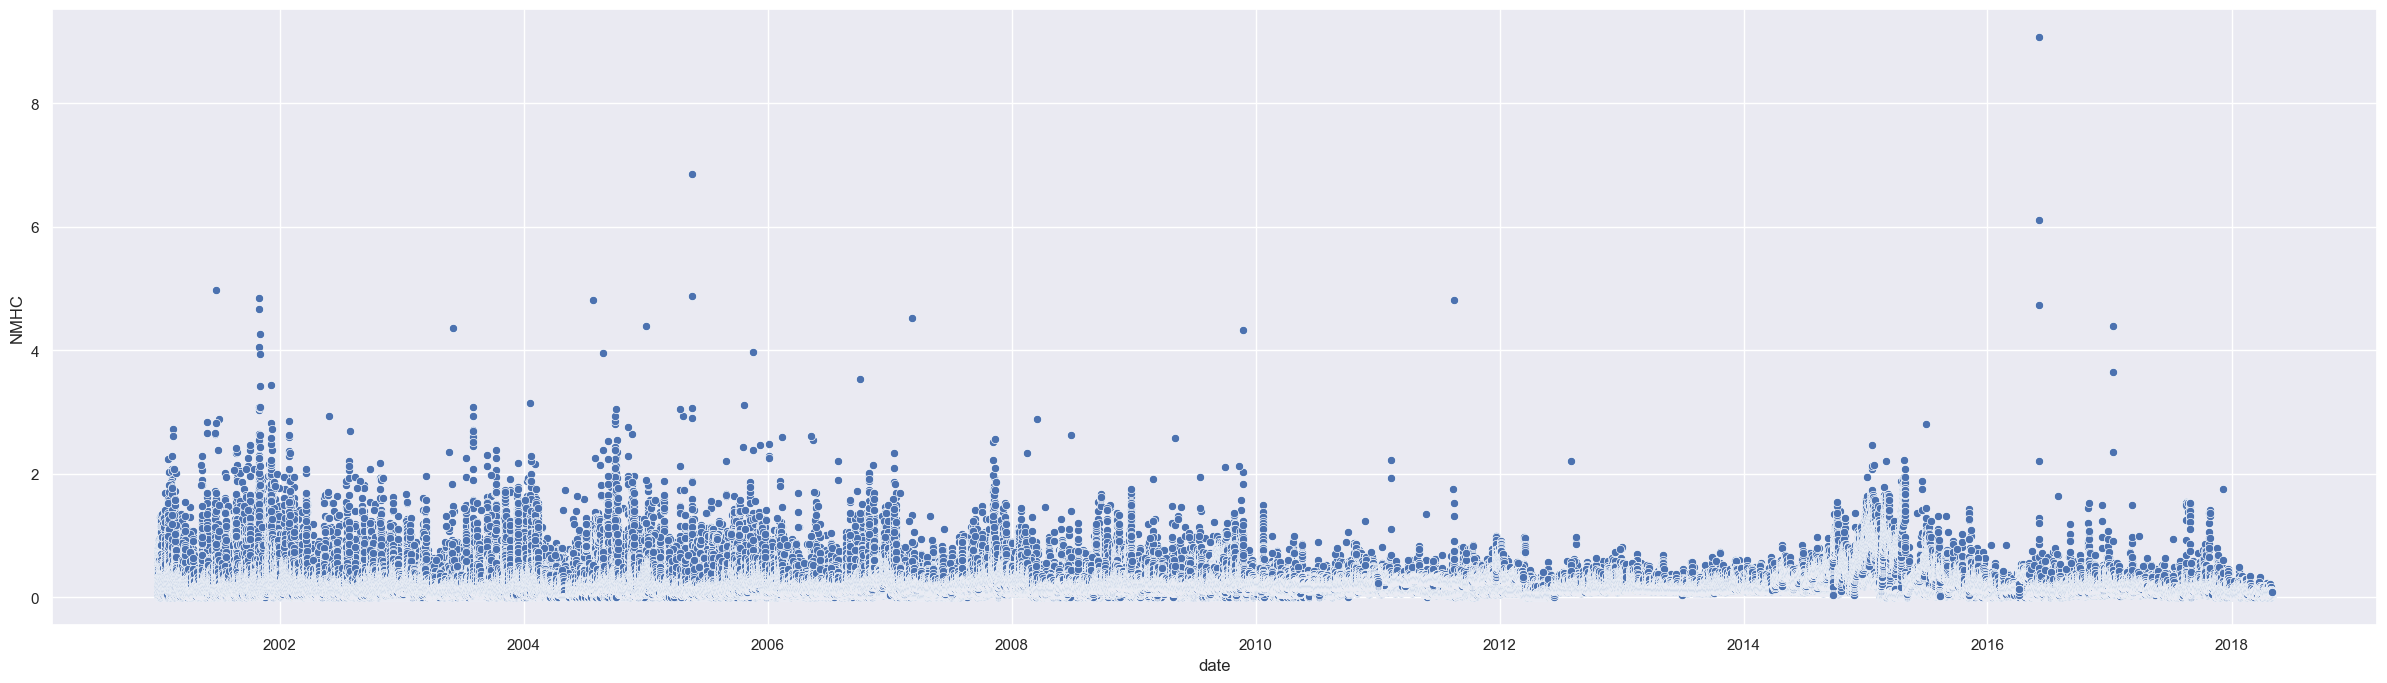

In [14]:
f = plt.figure(figsize=(30,8))
sns.scatterplot(x='date', y='NMHC', data=df_nmhc.reset_index())

We already see lots of suspicious records that might be outliers and distort the visualization. Let's check it with boxplot and violin plot to understand how really outliers influence the data.

<Axes: xlabel='station', ylabel='NMHC'>

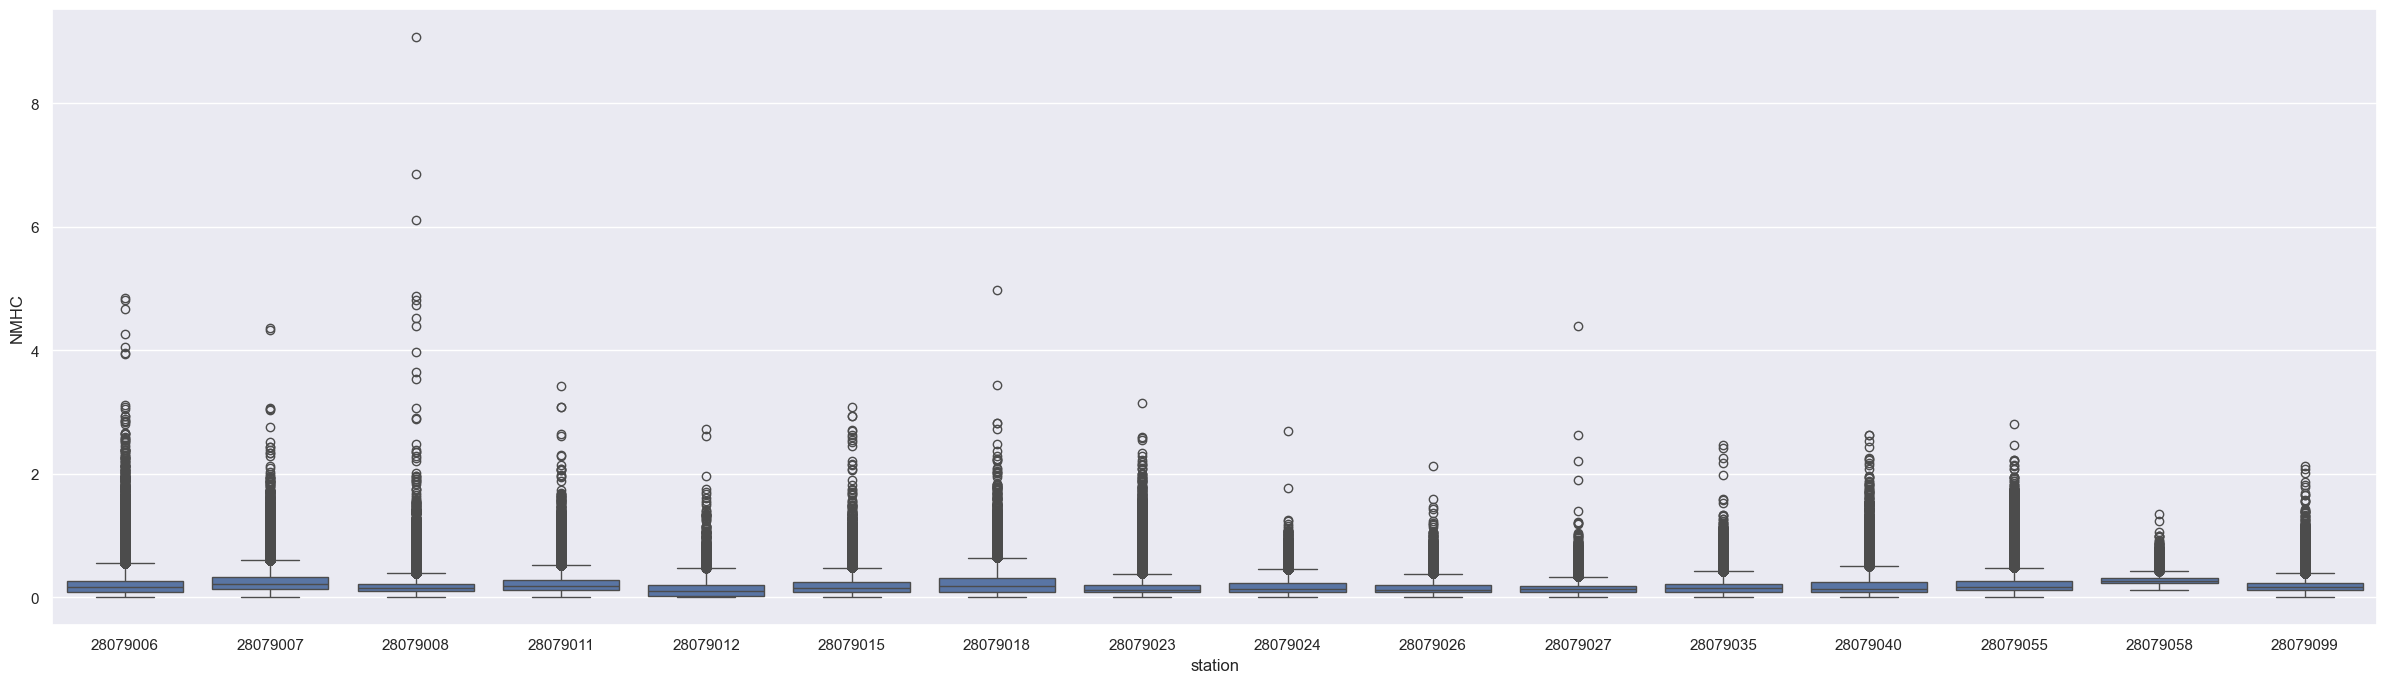

In [15]:
f = plt.figure(figsize=(30,8))
sns.boxplot(x='station', y='NMHC', data=df_nmhc.dropna(axis=0).reset_index())

<Axes: xlabel='station', ylabel='NMHC'>

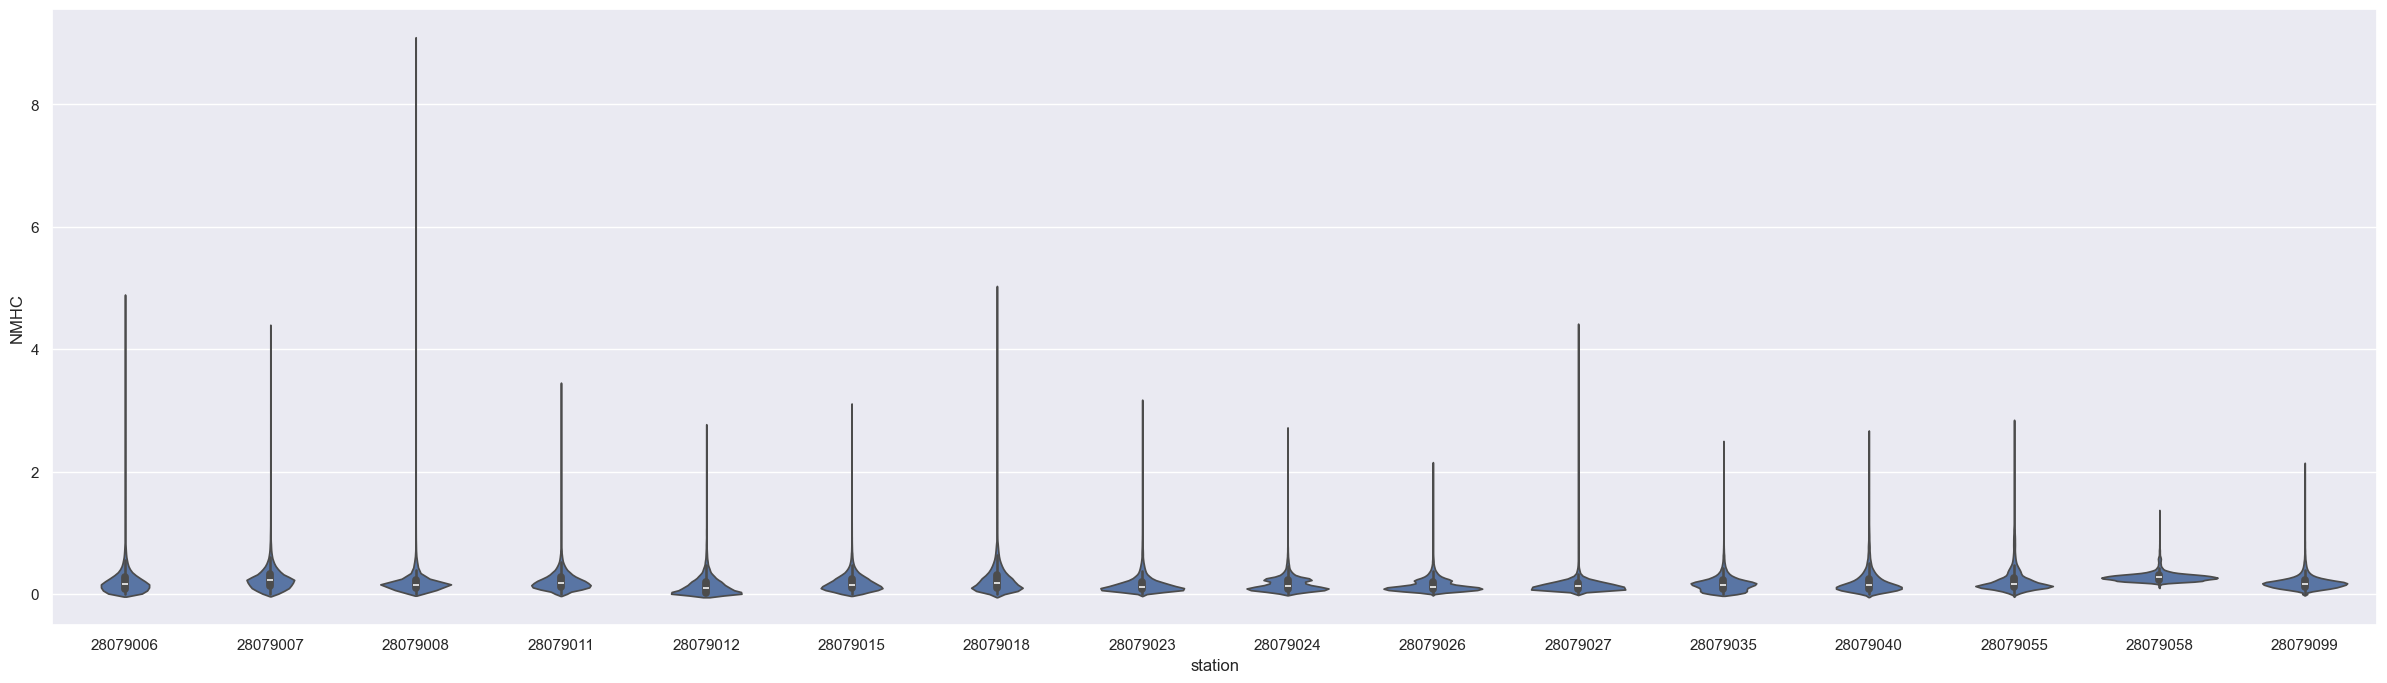

In [16]:
f = plt.figure(figsize=(30,8))
sns.violinplot(x='station', y='NMHC', data=df_nmhc.dropna(axis=0).reset_index())

And yes, we see a lot of outliers that can indicate particular events in the city that led to these measures that particular day/hour. Let's group our data into 8-hours sets and see how will it look.

In [19]:
df_nmhc_8h = df_nmhc.dropna(axis=0).groupby('station').resample('8H').mean().reset_index()
df_nmhc_8h.head()

,station,date,NMHC
0,28079006,2001-01-01 00:00:00,0.384286
1,28079006,2001-01-01 08:00:00,0.130000
2,28079006,2001-01-01 16:00:00,0.210000
3,28079006,2001-01-02 00:00:00,0.030000
4,28079006,2001-01-02 08:00:00,0.192500


C:\Users\nikky\AppData\Local\Temp\ipykernel_11180\625687630.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y='NMHC', data=df_nmhc_8h, palette=palette, ax=ax)
C:\Users\nikky\AppData\Local\Temp\ipykernel_11180\625687630.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='station', y='NMHC', data=df_nmhc_8h, palette=palette)


<Axes: xlabel='station', ylabel='NMHC'>

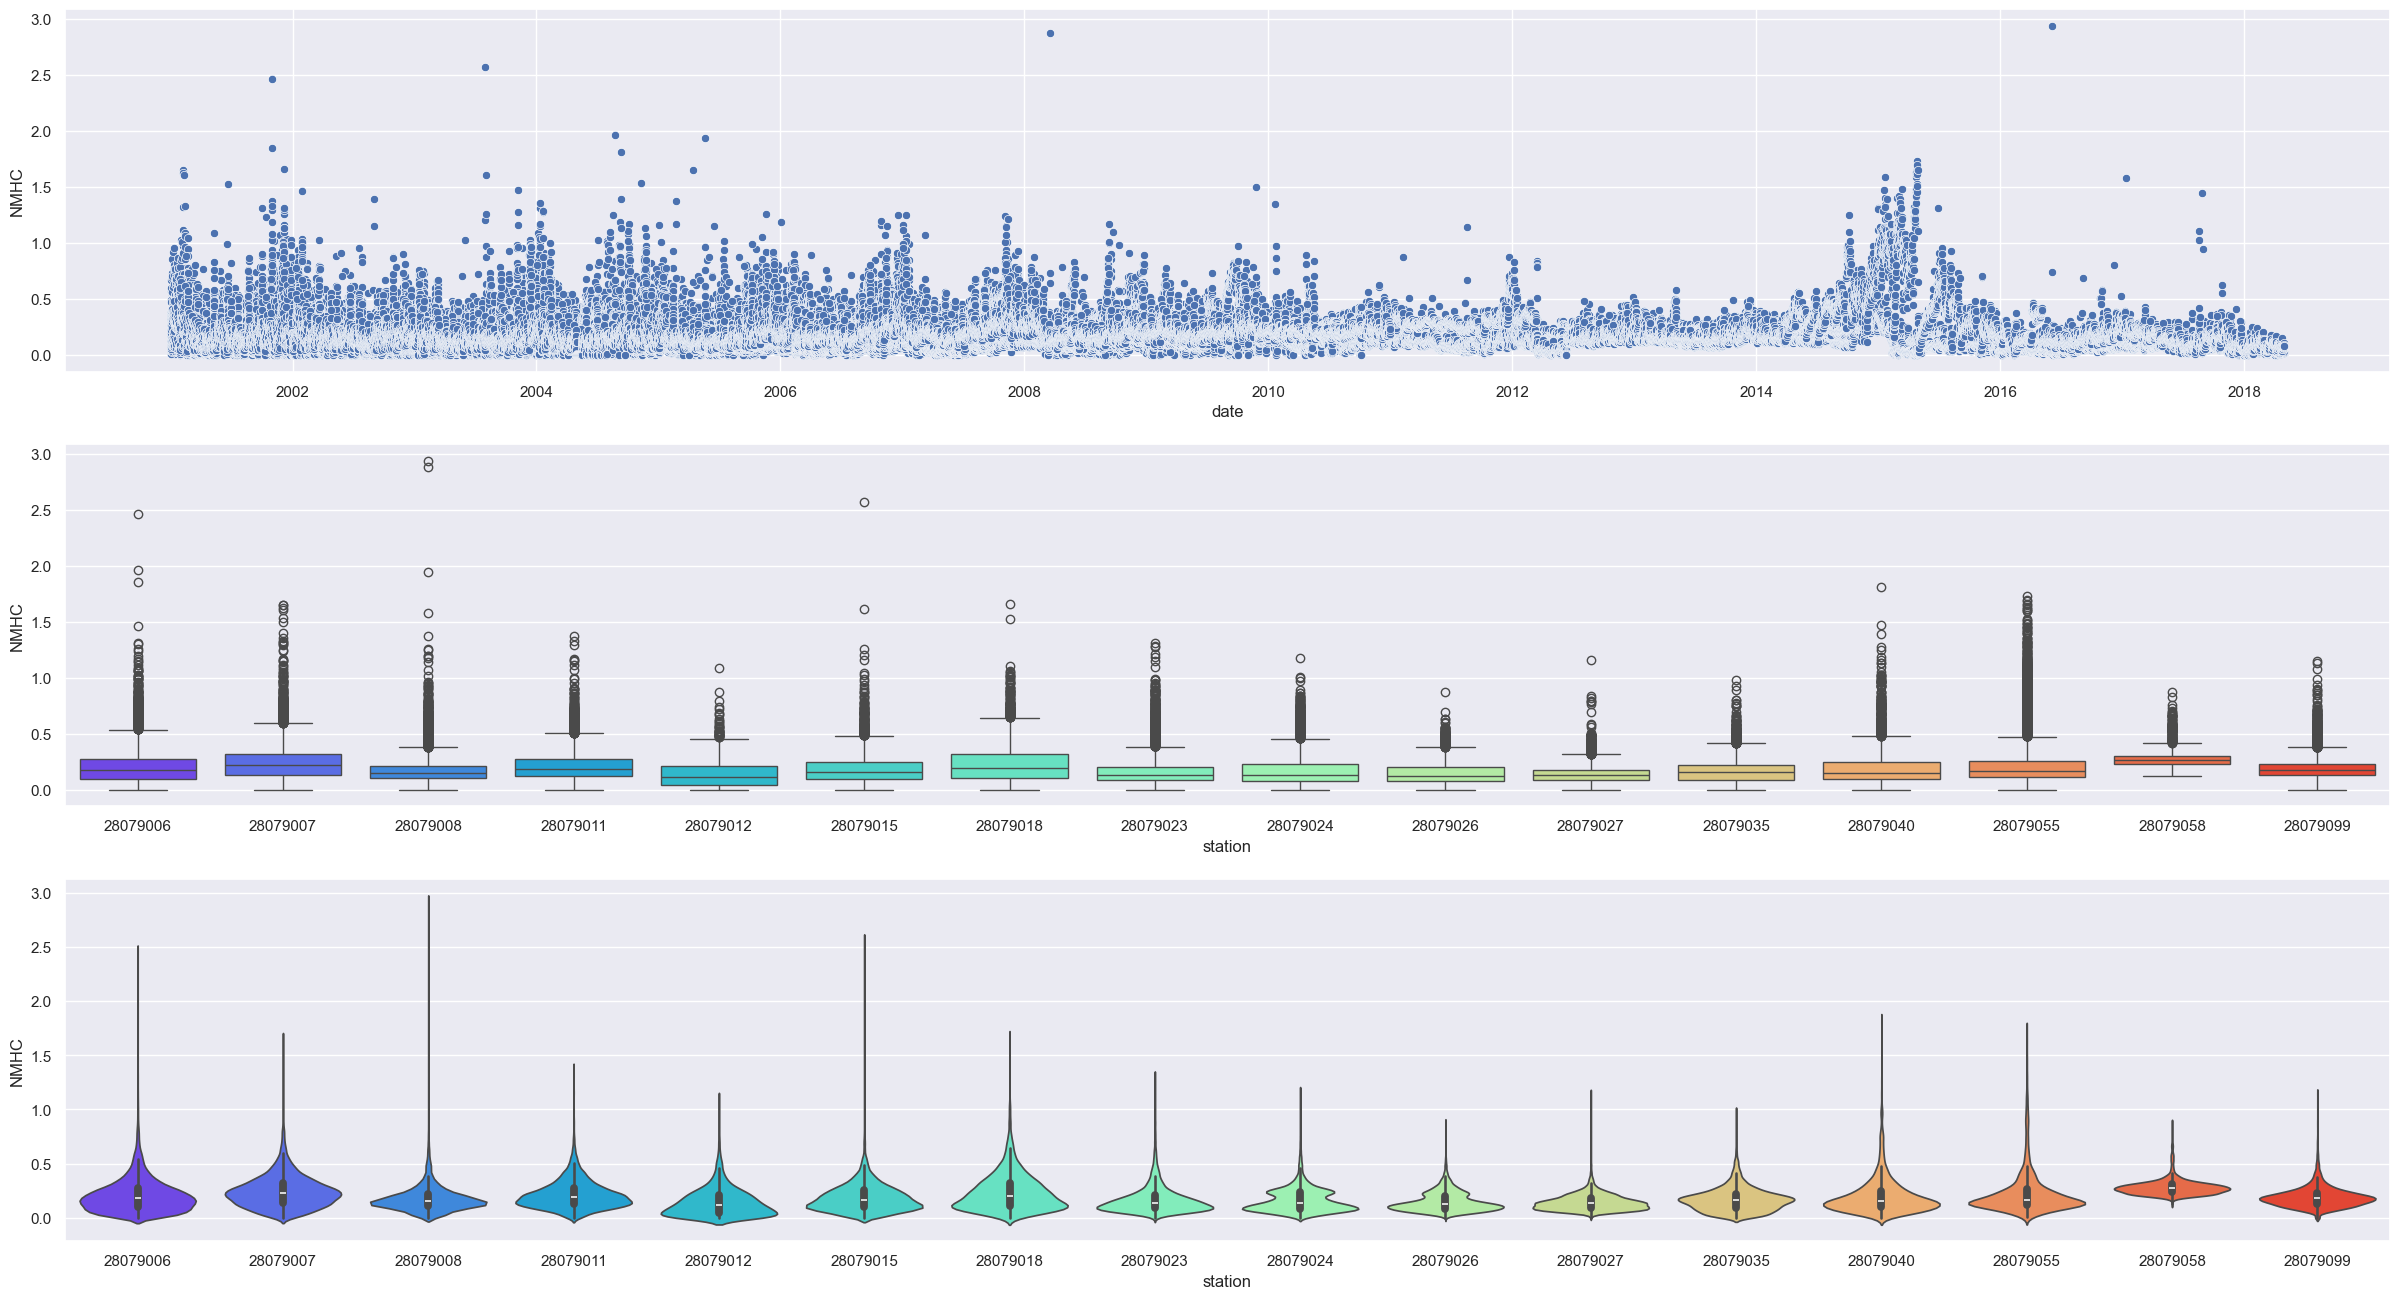

In [20]:
f = plt.figure(figsize=(30,16))
ax = f.add_subplot(3,1,1)
sns.scatterplot(x='date', y='NMHC', data=df_nmhc_8h, ax=ax)
ax = f.add_subplot(3,1,2)
palette = sns.color_palette("rainbow", 16)
sns.boxplot(x='station', y='NMHC', data=df_nmhc_8h, palette=palette, ax=ax)
ax = f.add_subplot(3,1,3)
palette = sns.color_palette("rainbow", 16)
sns.violinplot(x='station', y='NMHC', data=df_nmhc_8h, palette=palette)


In [22]:
df_nmhc.dtypes

station     object
NMHC       float64
dtype: object

In [23]:
df_nmhc[['station', 'NMHC']] = df_nmhc[['station', 'NMHC']].apply(pd.to_numeric, errors='coerce')

In [24]:

df_nmhc_year = df_nmhc.dropna(axis=0).resample('8H').mean()
df_nmhc_year['year'] = df_nmhc_year.index.year
df_nmhc_year.reset_index(inplace=True)

C:\Users\nikky\AppData\Local\Temp\ipykernel_11180\436057917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='NMHC', data=df_nmhc_year, palette=palette, ax=ax)
C:\Users\nikky\AppData\Local\Temp\ipykernel_11180\436057917.py:4: UserWarning: 
The palette list has fewer values (16) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='year', y='NMHC', data=df_nmhc_year, palette=palette, ax=ax)
C:\Users\nikky\AppData\Local\Temp\ipykernel_11180\436057917.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='year', y='NMHC', data=df_nmhc_year, palette=palette)
C:\Users\nikky\AppData\Local\Temp\ipykernel_11180\436057917.py:7: UserWarning: 


<Axes: xlabel='year', ylabel='NMHC'>

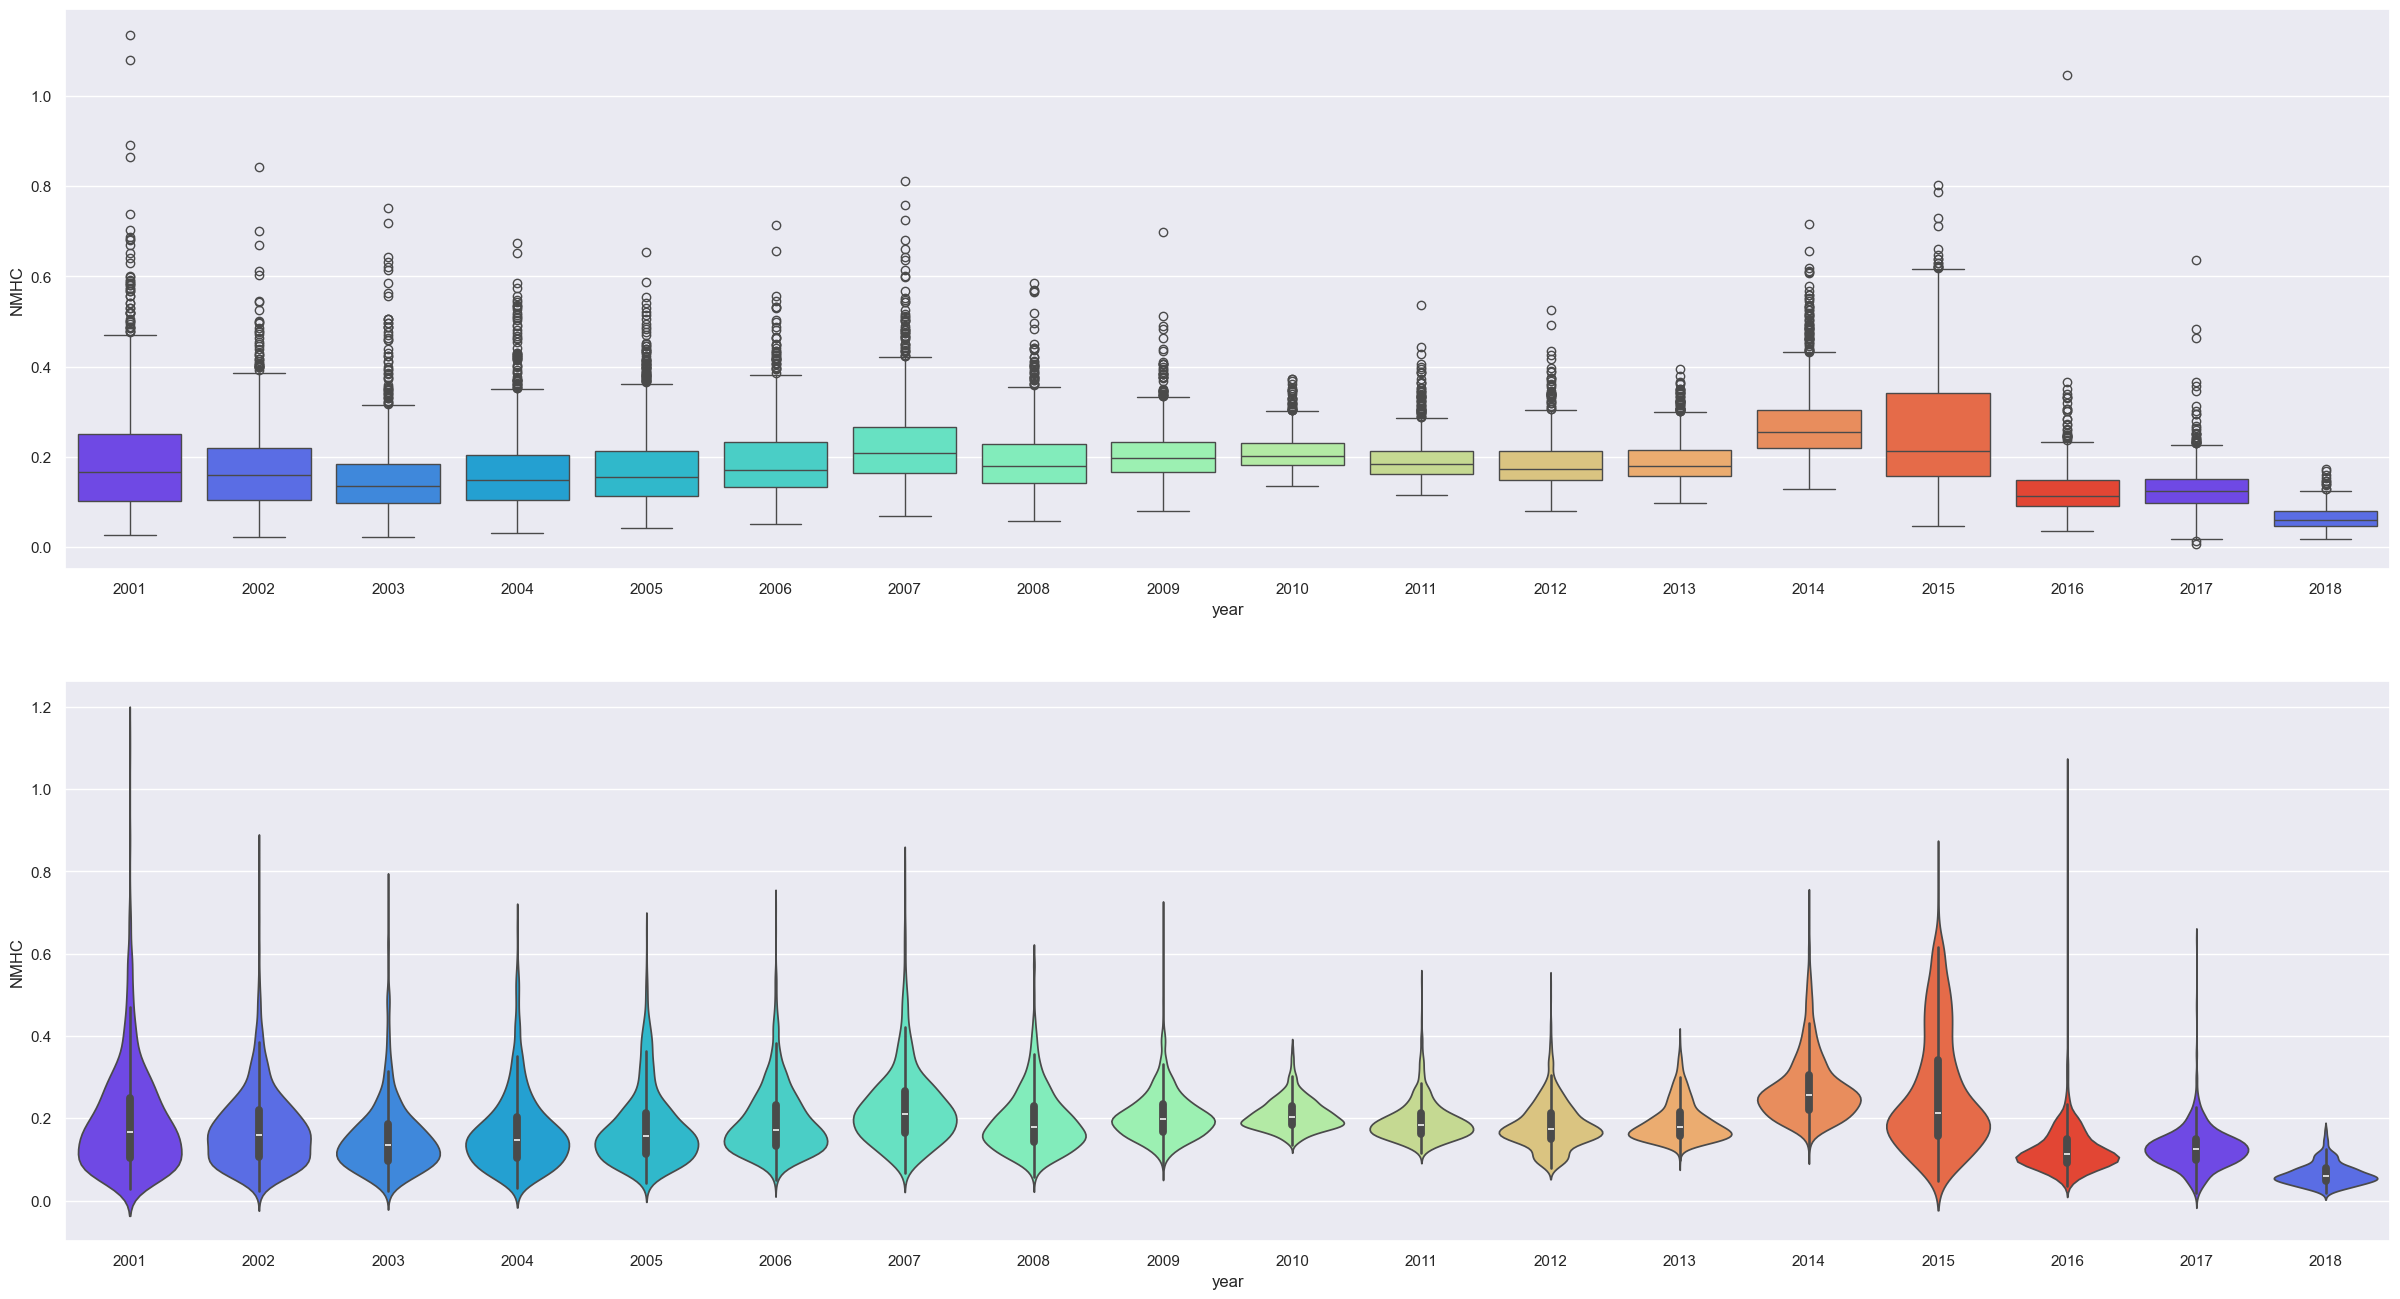

In [25]:
f = plt.figure(figsize=(30,16))
ax = f.add_subplot(2,1,1)
palette = sns.color_palette("rainbow", 16)
sns.boxplot(x='year', y='NMHC', data=df_nmhc_year, palette=palette, ax=ax)
ax = f.add_subplot(2,1,2)
palette = sns.color_palette("rainbow", 16)
sns.violinplot(x='year', y='NMHC', data=df_nmhc_year, palette=palette)

In [26]:
nan_columns = ['CO']

In [27]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [28]:
co_mean = measures['CO'].groupby('date').mean()

In [29]:
type(co_mean)

pandas.core.series.Series

In [30]:
df_mean = pd.DataFrame(data=co_mean, columns=['CO'])

In [31]:
# group data by different time periods
df_gr_D = df_mean.groupby(pd.Grouper(freq='D')).transform(np.mean).resample('D').mean()
df_gr_M = df_gr_D.groupby(pd.Grouper(freq='M')).transform(np.mean).resample('M').mean()

C:\Users\nikky\AppData\Local\Temp\ipykernel_11180\2634632256.py:2: FutureWarning: The provided callable <function mean at 0x0000028BC8F9AB60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_gr_D = df_mean.groupby(pd.Grouper(freq='D')).transform(np.mean).resample('D').mean()
C:\Users\nikky\AppData\Local\Temp\ipykernel_11180\2634632256.py:3: FutureWarning: The provided callable <function mean at 0x0000028BC8F9AB60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_gr_M = df_gr_D.groupby(pd.Grouper(freq='M')).transform(np.mean).resample('M').mean()


In [32]:
# prepare final dataset
df_detailed = df_gr_D.copy()
df_detailed['year'] = df_detailed.index.year
df_detailed['month'] = df_detailed.index.month
df_detailed['day'] = df_detailed.index.day
df_detailed.head()

,CO,year,month,day
date,,,,
2001-01-01,0.998400,2001,1,1
2001-01-02,0.709884,2001,1,2
2001-01-03,0.871186,2001,1,3
2001-01-04,0.848846,2001,1,4
2001-01-05,1.197067,2001,1,5


In [33]:
df_detailed.to_csv('./DATA/dataset_final.csv')